In [1]:
from utils import *

# Filtraggio nel dominio delle frequenze

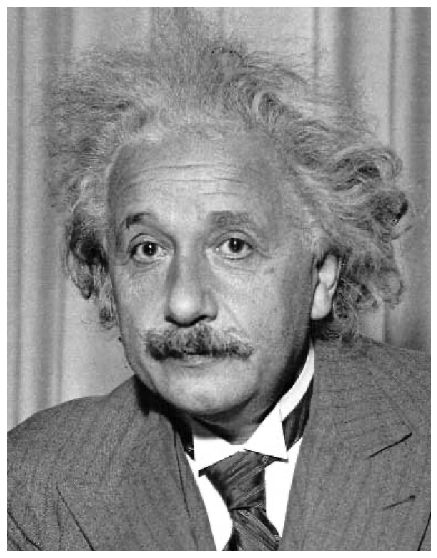

(762, 593) float32 <class 'numpy.ndarray'>


In [2]:
image = mp_image.imread(os.path.join(img_src,'einstein2.png'))
image = image[:,:,0]

img_show(image,cmap=cm.gray)

img_info(image)

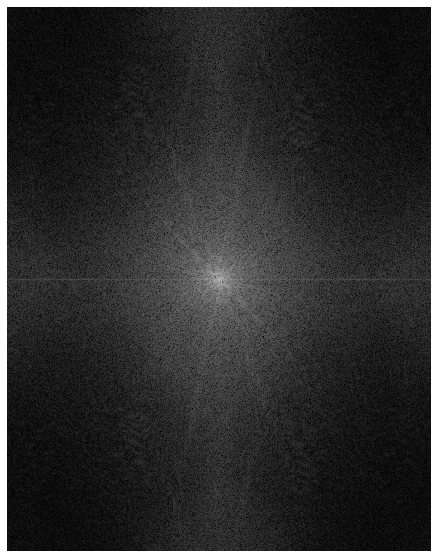

In [3]:

im_fft = np.fft.fft2(image)
img_fft_shifted = np.fft.fftshift(im_fft)

f_abs = np.abs(img_fft_shifted) + 1 # lie between 1 and 1e6
f_bounded = np.log(1+f_abs)
f_img = 255 * f_bounded / np.max(f_bounded)
f_img = f_img.astype(np.uint8)

img_show(f_img,cmap=cm.gray)

Vediamo anche la fase

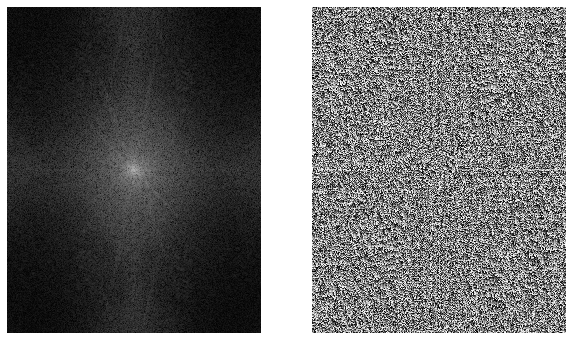

In [4]:
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1) 
plt.imshow(f_img,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 2, 2) 
plt.imshow(np.angle(img_fft_shifted),cmap=cm.gray)
plt.axis('off')

plt.show()

Proviamo ad implementare un filtro passa-basso: In particolare il box filter. Il box filter dovrebbe mantenere tutte le frequenze vicine allo zero (diciamo il 10%) e tagliare le altre. 

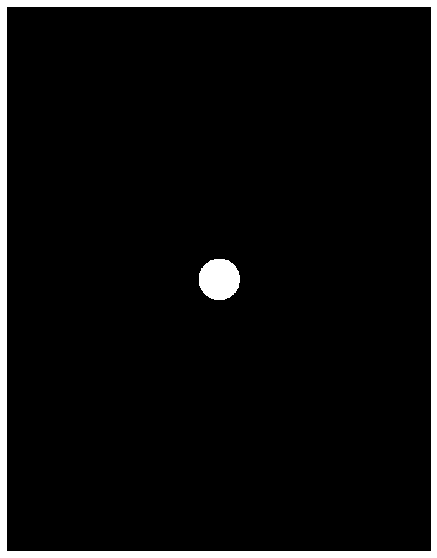

In [5]:
keep_fraction = 0.05

im_fft2 = im_fft.copy()

r, c = im_fft2.shape

def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def BoxFilterLP(fraction,imgShape):
    D0 = int(min(fraction*imgShape[:2]))
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 255
    return base

filter = BoxFilterLP(keep_fraction,np.array([r,c]))

img_show(filter,cmap=cm.gray)

#filter

Applicando il filtro di cui sopra all'ampiezza della trasformata, abbiamo: 

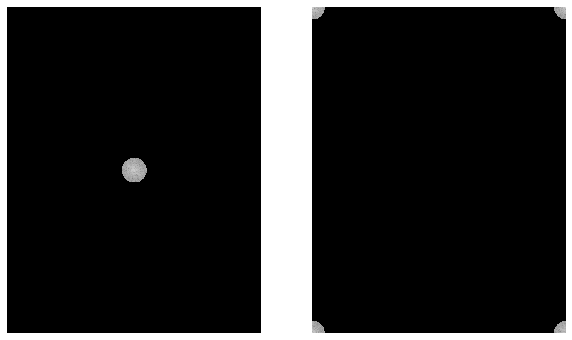

In [6]:

LowPassCenter = img_fft_shifted*filter

LowPass = np.fft.ifftshift(LowPassCenter)

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1) 
plt.imshow(np.log(1+np.abs(LowPassCenter)),cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 2, 2) 
plt.imshow(np.log(1+np.abs(LowPass)),cmap=cm.gray)
plt.axis('off')

plt.show()


**Domanda:** Perché applichiamo la decentralizzazione?

Otteniamo a questo punto l'immagine trasformata: 

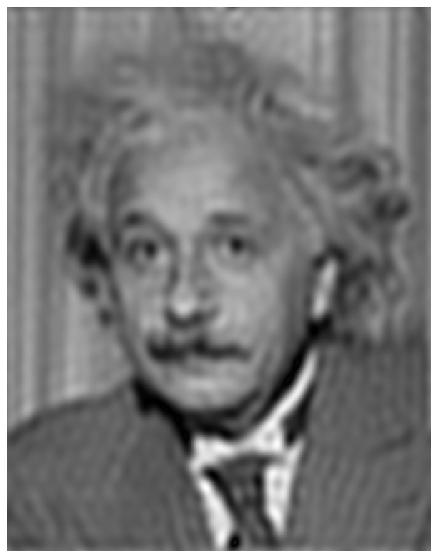

In [7]:
inverse_LowPass = np.fft.ifft2(LowPass)


img_show(np.abs(inverse_LowPass),cmap=cm.gray)

### Esercizio

Se volessimo applicare un filtro gaussiano? Come dovremmo cambiare il codice di cui sopra?


In pratica, abbiamo tagliato tutte le frequenze basse. Proviamo a ricostruire l'immagine originaria

***

Proviamo ad applicare un filtro High-Pass. Usiamo lo stesso esempio di prima ma al contrario 


In [8]:

filter = BoxFilterLP(0.3,np.array([r,c]))

filter = 255-filter

HighPassCenter = img_fft_shited*filter

HighPass = np.fft.ifftshift(LowPassCenter)

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 3, 1) 
plt.imshow(filter,cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 2) 
plt.imshow(np.log(1+np.abs(HighPassCenter)),cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 3) 
plt.imshow(np.log(1+np.abs(HighPass)),cmap=cm.gray)
plt.axis('off')

plt.show()

NameError: name 'img_fft_shited' is not defined

In [ ]:
inverse_HighPass = np.fft.ifft2(HighPass)

img_show(np.abs(inverse_HighPass),cmap=cm.gray)

****

Come ultimo esempio, proviamo ad applicare il teorema di convoluzione 

In [ ]:
#kernel_orig = np.ones((3,3)) / 9
#kernel_orig=np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
kernel_orig=np.array([ [1,0,-1], [2,0,-2], [1,0,-1]])
#kernel_orig=np.transpose(kernel,2)

img = image

sz = (img.shape[0] - kernel_orig.shape[0], img.shape[1] - kernel_orig.shape[1])  # total amount of padding
kernel = np.pad(kernel_orig, (((sz[0]+1)//2, sz[0]//2), ((sz[1]+1)//2, sz[1]//2)), 
'constant')


In [ ]:

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(2, 1, 1) 
plt.imshow(kernel_orig,cmap=cm.gray)
plt.title("Kernel (original)")
plt.axis('off')

fig.add_subplot(2, 1, 2) 
plt.title("Kernel (esteso)")
plt.imshow(kernel,cmap=cm.gray)
plt.axis('off')


plt.show()

In [ ]:
fft_k = np.fft.ifftshift(np.fft.fft2(kernel))
fft_im = np.fft.ifftshift(np.fft.fft2(img))

con_in_f=fft_im*fft_k


fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 3, 1) 
plt.imshow(np.log(1+np.abs(fft_k)),cmap=cm.gray)
plt.title("Fourier of kernel")
plt.axis('off')

fig.add_subplot(1, 3, 2) 
plt.title("Fourier of image")
plt.imshow(np.log(1+np.abs(fft_im)),cmap=cm.gray)
plt.axis('off')

fig.add_subplot(1, 3, 3) 
plt.title("Fourier of Product")
plt.imshow(np.log(1+np.abs(con_in_f)),cmap=cm.gray)
plt.axis('off')



plt.show()

In [ ]:
filtered = abs(np.fft.ifftshift(np.fft.ifft2(con_in_f)))

#filtered=np.maximum(0,np.minimum(filtered,255))



fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 2, 1) 
plt.imshow(image,cmap=cm.gray)
plt.title("Original image")
plt.axis('off')

fig.add_subplot(1, 2, 2) 
plt.title("Filtered (frequency domain)")
plt.imshow(filtered,cmap=cm.gray)
plt.axis('off')

plt.show()




